Number of rows: 1949, Number of columns: 11

Continuous Features: Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

Categorical Features: Index(['Country name'], dtype='object')
              year  Life Ladder  Log GDP per capita  Social support  \
count  1949.000000  1949.000000         1913.000000     1936.000000   
mean   2013.216008     5.466705            9.368453        0.812552   
std       4.166828     1.115711            1.154084        0.118482   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.464000        0.749750   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.353000        0.905000   
max    2020.000000     8.019000         

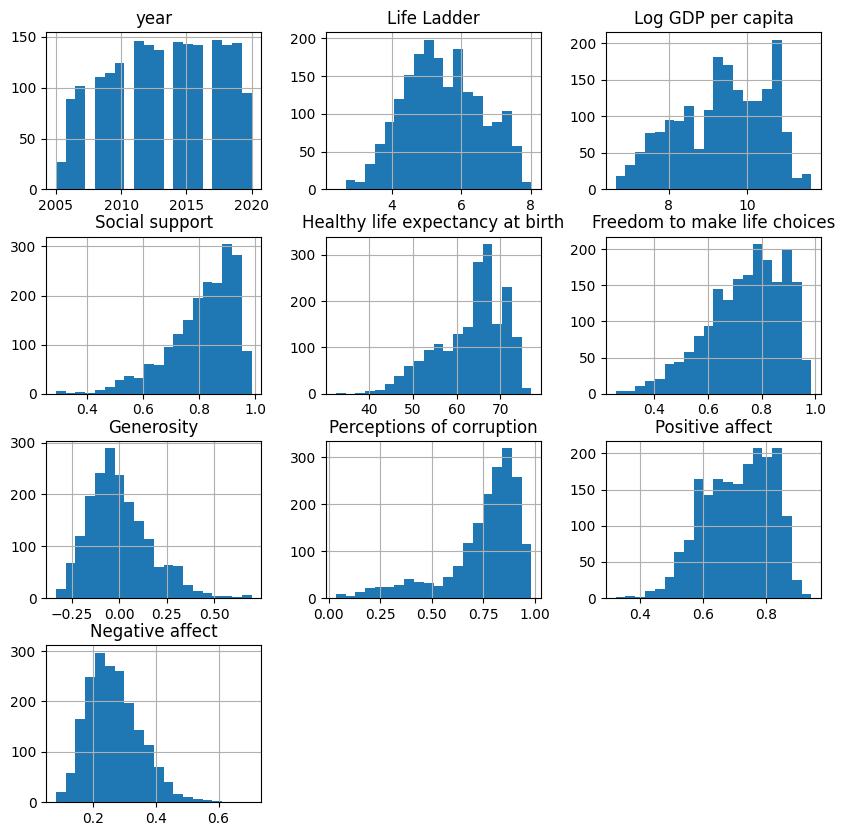

Country name
Zimbabwe        15
South Africa    15
Tanzania        15
Denmark         15
Tajikistan      15
                ..
Maldives         1
Suriname         1
Cuba             1
Oman             1
Guyana           1
Name: count, Length: 166, dtype: int64
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('happiness_data.csv')

# Data summary
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# Separate continuous and categorical features
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

print(f"\nContinuous Features: {continuous_features}")
print(f"\nCategorical Features: {categorical_features}")

# Summary statistics for continuous features
print(df[continuous_features].describe())

# Visualize distributions for continuous attributes
df[continuous_features].hist(figsize=(10, 10), bins=20)
plt.show()

# Display value counts for categorical attributes
for col in categorical_features:
    print(df[col].value_counts())

# Check for missing values or outliers
print(df.isnull().sum())


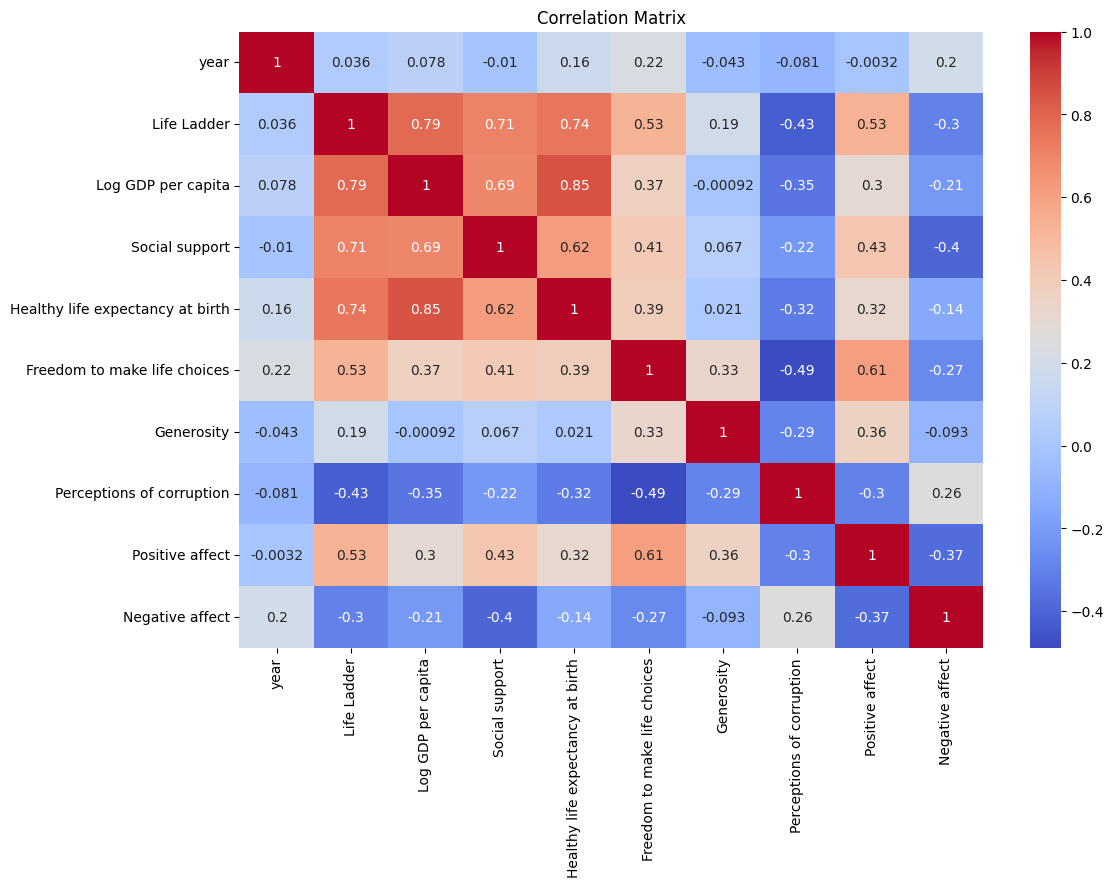

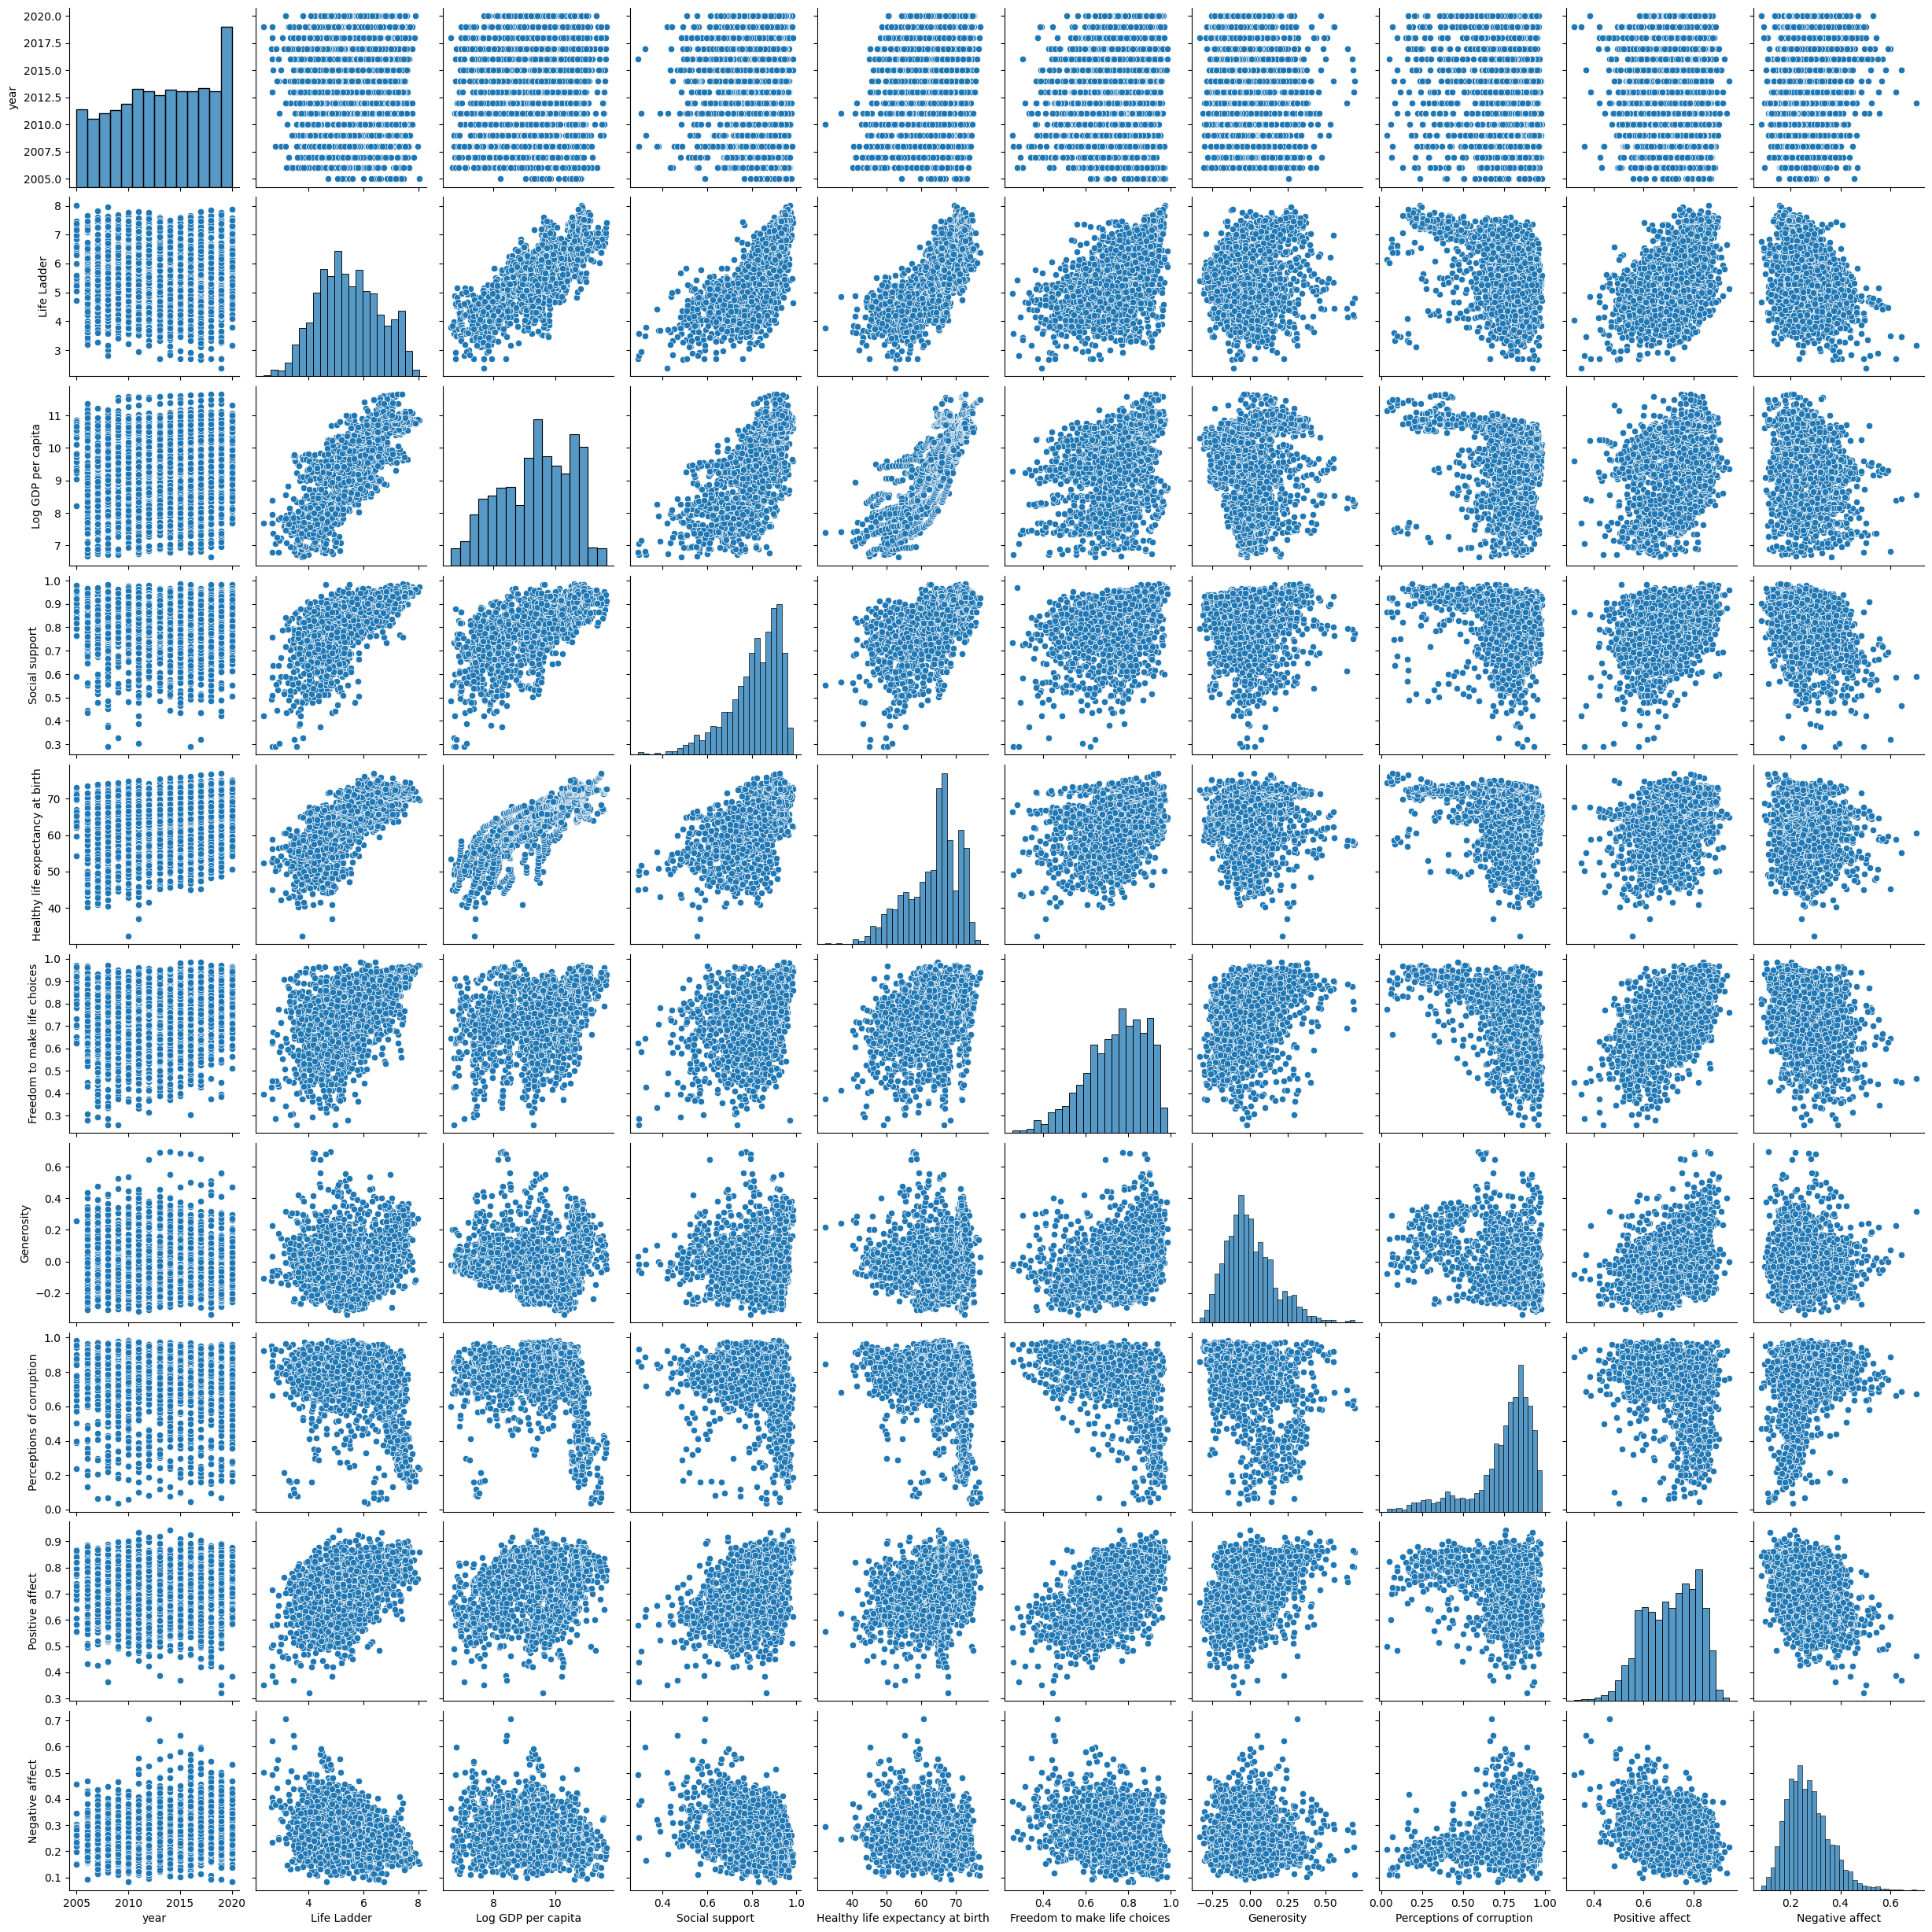

In [4]:
# # Compute Pearson Correlation Coefficient (PCC)
# correlation_matrix = df.corr()

# # Plot heatmap of correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()


# numeric_df = numeric_df.dropna()  # or numeric_df.fillna(numeric_df.mean())
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Compute Pearson Correlation Coefficient (PCC)
correlation_matrix = numeric_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Generate scatter plots for key attributes
sns.pairplot(df[continuous_features])
plt.show()

In [5]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
train_set, test_set = train_test_split(df, test_size=0.25, random_state=42)

# Verify that the test set is representative
print(train_set.describe())
print(test_set.describe())



              year  Life Ladder  Log GDP per capita  Social support  \
count  1461.000000  1461.000000         1436.000000     1453.000000   
mean   2013.137577     5.457548            9.358944        0.812285   
std       4.199914     1.117221            1.166775        0.118882   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.639000            8.452250        0.753000   
50%    2013.000000     5.346000            9.448500        0.834000   
75%    2017.000000     6.269000           10.343250        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1424.000000                   1443.000000   
mean                          63.287343                      0.740450   
std                            7.524471                      0.143169   
min                           32.300000                      0.26000

Linear Regression cross-validation score:  [0.77480841 0.75900076 0.69787893]
Ridge cross-validation score:  [0.77072389 0.76088974 0.70187612]
Lasso cross-validation score:  [0.61937595 0.65673878 0.56516337]
ElasticNet cross-validation score:  [0.621605   0.65874887 0.59503441]


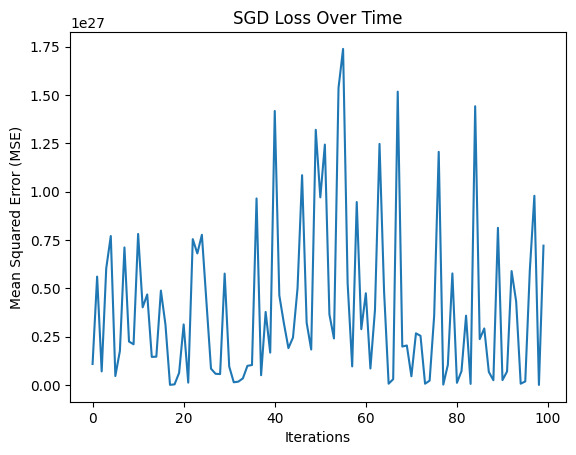

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# Drop 'Country name' as it's non-numeric and 'year' if you don't need it
data = df.drop(['Country name', 'year'], axis=1)

# The label is assumed to be 'Life Ladder'
# Combine features and label for consistent missing value handling
data = data.dropna()

# Separate features and label
X_train = data.drop('Life Ladder', axis=1)  # Features
y_train = data['Life Ladder']               # Labels

# Now X_train and y_train will have the same number of rows

# Linear Regression using Normal Equation (closed-form solution)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate using 3-fold cross-validation
cv_scores = cross_val_score(lr, X_train, y_train, cv=3)
print("Linear Regression cross-validation score: ", cv_scores)

# Ridge, Lasso, and ElasticNet regularization
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1)

models = [ridge, lasso, elastic_net]
for model in models:
    model.fit(X_train, y_train)
    cv_score = cross_val_score(model, X_train, y_train, cv=3)
    print(f"{model.__class__.__name__} cross-validation score: ", cv_score)

# Linear Regression with SGD
sgd = SGDRegressor(max_iter=1000, penalty='l2', learning_rate='adaptive')
sgd.fit(X_train, y_train)

# Plotting loss over iterations manually
train_losses = []

for i in range(1, 101):
    sgd.partial_fit(X_train, y_train)
    loss = ((y_train - sgd.predict(X_train)) ** 2).mean()  # Mean Squared Error
    train_losses.append(loss)

# Plotting the training loss over iterations
plt.plot(train_losses)
plt.title('SGD Loss Over Time')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()
